# Súčet normálnych rozdelení

Odvodenie rozdelenia hustory pravdepodobnosti pre súčet dvoch náhodných premenných je trochu komplikovanejšie ako pri súčine. 

In [1]:
%reset -f  
%matplotlib inline

from numpy import *
from numpy.random import normal, randn
import matplotlib.pyplot as plt

Pre odvodenie súčtu normálnych rozdelení (<i>pdf</i>) dvoch nezávislých náhodných premenných $X$, $Y$ použijeme funkciu rozdelenia súčtu pravdepodobnosti(<i>distribučná funkcia, PDF</i>}) $F_{X+Y}(a) = P(X+Y <= a)$. Rovnako ako v prípade súčinu platí, že funkcií rozdelenia hustoty pravdepodobností súčtu <b>nie</b> je ekvivalentom súčtu hodnôt náhodných premenných.

Definujme oblasť $R$ v rovine a zvoľme $a \in \Re$ tak, aby platilo $R = \lbrace (x,y): x+y \leq a \rbrace$. Takáto oblasť obsahuje všetky kombinácie hodnôt, ktoré spĺňajú podmienku $x+y \leq a$, pre určenie hodnoty $F_{X+Y}(a)$ potrebujeme určiť ich celkový počet, ktorá je úmerný veľkosti plochy $R$.

<img src="img/normal_sum_02.png">

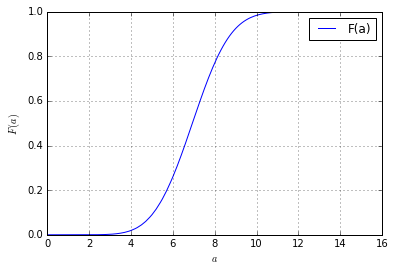

In [2]:
# Priklad - Urcenie hodnot funkcie P(a) = P(X+Y <= a)

mean1, sigma1 = 5., 1.2  
mean2, sigma2 = 2., 0.8  

m=10000
X = normal(mean1, sigma1, m)                    # nahodne premenne X,Y
Y = normal(mean2, sigma2, m)

F = []                                          # pole hodnot P(a)
step = 0.1
a = arange(0.0, 15.0, step)                     # rozsah hodnot a

for k in a:                                     # iteracia cez hodnoty a
    R = 0.0                                     # Hodnota sumy pre plochu R pri danom a
    for x in arange(0.0, k-step, step):         # pre aktualne hodnoty a,x
        q = sum(X <= (x + step)) - sum(X < x)   # urcime pocetnost hodnot premennej X v rozsahu <x, x+step>          
        w = sum(Y <= (k - x))                   # a pocetnost hodnot premennej Y v rozsahu <0, a-x>
        R = R + (q*w)/(m*m)                     # vypocitame plochu slizika, normujeme a pripocitame k celkovej ploche
    F.append(R)                                 # hodnotu plochy pre dane a zaradime do pla 

plt.plot(a, F, label = 'F(a)')
plt.xlabel('$a$')
plt.ylabel('$F\,(a)$')
plt.legend()
plt.grid()
plt.show()

Vlastné rozdelenie hustoty pravdepodobnosti získame ako derivácu funkcie dostribúcie pravdepodobnosti

\begin{equation}
f_{X,Y}(a) = F_{(X+Y)}^{'}(a) 
\end{equation}

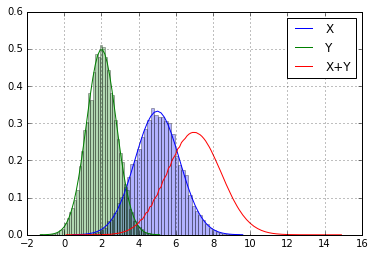

In [3]:
F = array(F)                                     # konverzia zoznamu na numpy-pole
f = (F[1:] - F[:-1]) / step                      # derivacia P(a)

gauss = lambda x,mean,sigma: 1/(sigma*sqrt(2 * pi))*exp(-(x-mean)**2 / (2*sigma**2) )

_, n, _ = plt.hist(X, 50, normed=True, alpha=0.3)
plt.plot(n, gauss(n, mean1, sigma1), 'b-', label='X')

_, n, _  = plt.hist(Y, 50, normed=True, alpha=0.3)
plt.plot(n, gauss(n, mean2, sigma2), 'g-', label='Y')

plt.plot(a[1:],f, label='X+Y')
plt.legend()
plt.grid()
plt.show()

Na základe vyššie uvedeného postup môžeme formálne odvodiť všeobecný vzťah pre rozdelenie hustoty pravdepodobnosti súčtu náhodných premenných. 

Ak sú premenné $X$ a $Y$ štatisticky nezávislé, budeme predpokladať že platí

\begin{equation}
f_{X,Y}(x,y) = f_X(x) \, f_Y(y)
\end{equation}

Potom
\begin{equation}
F_{X+Y}(a) = P ( X+Y \leq a  )
\end{equation}

\begin{equation}
= P ( X,Y \in R  )
\end{equation}

\begin{equation}
= \iint_R f_{X,Y}(x,y) dA
\end{equation}

\begin{equation}
= \iint_R f_X(x) \, f_Y(y) dA
\end{equation}

\begin{equation}
= \int_{-\infty}^{\infty} f_X(x) \bigg(  \int_{-\infty}^{a-x} f_Y(y) \, dy \bigg) dx
\end{equation}

\begin{equation}
= \int_{-\infty}^{\infty} f_X(x) \bigg[  F_{y}(a-x) - 0 \bigg] dx
\end{equation}

z čoho po roznásobení vyplýva

\begin{equation}
F_{X+Y}(a) = \int_{-\infty}^{\infty} f_X(x) F_{Y}(a-x) \, dx
\end{equation}

čo je v podstate súčet hodnôt elementárnych 'slížikov' v rovine $R$ o šírke $dx$ pre danú hodnotu $a$.



Pretože platí

\begin{equation}
f_{X+Y}(a) = \frac {F_{X+Y}(a)} {d a} = F_{(X+Y)}^{'}(a) 
\end{equation}

\begin{equation}
= \int_{-\infty}^{\infty} f_X(x) \, F_{Y}^{'}(a-x) \, dx
\end{equation}

\begin{equation}
= \int_{-\infty}^{\infty} f_X(x) \, f_{y}(a-x) \, dx
\end{equation}


môžeme hovoriť, že konvolúcia 

\begin{equation}
f_Z(z) = (f_Y * f_X) = \int_{-\infty}^{\infty} f_Y(z-x) \, f_X(x) \, dx
\end{equation}


predstavuje integráciu vzájomnej hustoty $f_{X+Y}(x,y) = f_X(x) \, f_Y(y)$ pozdĺž línie $x+y \leq a$.

Vyššie uvedené vzťahy platia pre súčet ľubovolných rozdelení, v nasledujúcom odvodíme vzťah pre súčet dvoch normálnych rozdelení. Nech $p_X$ a $p_Y$ sú normálne rozdelenia

\begin{equation}
f_X(x) = \frac{1}{\sqrt{2\pi}\sigma_X} e^{-(x-\mu_X)^2/(2\sigma_X^2)}
\end{equation}

\begin{equation}
f_Y(y) = \frac{1}{\sqrt{2\pi}\sigma_Y} e^{-(y-\mu_Y)^2/(2\sigma_Y^2)}
\end{equation}

Substitúciou do konvolúcie dostaneme

\begin{equation}
f_Z(z) = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma_Y} e^{-{(z-x-\mu_Y)^2 \over 2\sigma_Y^2}} \frac{1}{\sqrt{2\pi}\sigma_X} e^{-{(x-\mu_X)^2 \over 2\sigma_X^2}} \, dx 
\end{equation}

\begin{equation}
=  \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi} \sqrt{\sigma_X^2+\sigma_Y^2}} \, \exp \, \left[ - { (z-(\mu_X+\mu_Y))^2 \over 2(\sigma_X^2+\sigma_Y^2) } \right]  \frac{1}{\sqrt{2\pi} \frac{\sigma_X\sigma_Y} {\sqrt{\sigma_X^2+\sigma_Y^2}}} \, \exp \, \left[ - \frac{\left(x-\frac{\sigma_X^2(z-\mu_Y)+\sigma_Y^2\mu_X} {\sigma_X^2+\sigma_Y^2}\right)^2} {2\left(\frac{\sigma_X\sigma_Y}{\sqrt{\sigma_X^2+\sigma_Y^2}}\right)^2} \right] \, dx 
\end{equation}


\begin{equation}
=  \frac{1}{\sqrt{2\pi(\sigma_X^2+\sigma_Y^2)}} \, \exp \, \left[ - { (z-(\mu_X+\mu_Y))^2 \over 2(\sigma_X^2+\sigma_Y^2) } \right] \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\frac{\sigma_X\sigma_Y}{\sqrt{\sigma_X^2+\sigma_Y^2}}} \, \exp  \,\left[ - \frac{\left(x-\frac{\sigma_X^2(z-\mu_Y)+\sigma_Y^2\mu_X}{\sigma_X^2+\sigma_Y^2}\right)^2}{2\left(\frac{\sigma_X\sigma_Y}{\sqrt{\sigma_X^2+\sigma_Y^2}}\right)^2} \right] \, dx
\end{equation}

Výraz pod integrálom na pravej strane je hustota pravdepodobnosti a jej integrál je rovny 1. Výsledný výraz má tvar

\begin{equation}
f_Z(z) = \frac{1}{\sqrt{2\pi(\sigma_X^2+\sigma_Y^2)}} \exp \left[ - { (z-(\mu_X+\mu_Y))^2 \over 2(\sigma_X^2+\sigma_Y^2) } \right]
\end{equation}

z ktorého je zrejmé, že pre súčet funkcií rozdelenia hustoty pravdepodobnosti dvoch nezávislých náhodných premenných platí

\begin{equation}
\mu = \mu_1  + \mu_2 
\end{equation}

\begin{equation}
\sigma^2 = \sigma_1^2 + \sigma_2^2
\end{equation}

Na základe týchto vzťahov môžeme preveriť numerický výpočet zo začiatku kapitoly.

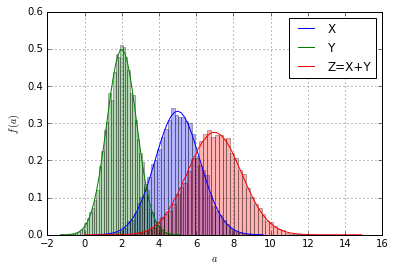

In [4]:
# Priklad - Overenie numerickeho vypoctu

_, n, _ = plt.hist(X, 50, normed=True, alpha=0.3)
plt.plot(n, gauss(n, mean1, sigma1), 'b-', label='X')

_, n, _  = plt.hist(Y, 50, normed=True, alpha=0.3)
plt.plot(n, gauss(n, mean2, sigma2), 'g-', label='Y')

plt.plot(a[1:],f, label='Z=X+Y')
Z = normal(mean1 + mean2, sqrt(sigma1**2 + sigma2**2), m)
plt.hist(Z, 50, color='red', normed=True, alpha=0.3)

plt.legend()
plt.xlabel('$a$')
plt.ylabel('$f\,(a)$')
plt.grid()
plt.show()